In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_dice_close_edges(dice_img):
    detected_edges = cv2.Canny(dice_img, 10, 170)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    return cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=2)

In [3]:
def detect_circles(gray_img):
    gray_blurred = cv2.blur(gray_img, (3, 3))
    # Apply Hough transform on the blurred image.
    detected_circles = cv2.HoughCircles(gray_blurred, 
                    cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
                param2 = 30, minRadius = 1, maxRadius = 40)
    if detected_circles is not None:
        return np.uint16(np.around(detected_circles))[0, :]
    return []

In [11]:
def calculate_dice_number(contour, result, gray, font_size=1, color=(0, 0, 255)):
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 3)
    circles = detect_circles(gray[y:y+h, x:x+w])
    for circle in circles:
        a, b, r = circle
        cv2.circle(result, (x+a, y+b), r, (255, 0, 0), 3)
    cv2.putText(result, f'Score: {len(circles)}', (x, y), cv2.FONT_ITALIC, font_size, color, 2)
    return result

In [5]:
def calculate_dice_number_2(contour, circles, result, font_size=0.4, color=(0, 0, 0), thicknes=1):
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 3)
    cv2.putText(result, f'Score: {len(circles)}', (x, y), cv2.FONT_ITALIC, font_size, color, thicknes)
    for circle in circles:
        x, y, w, h = cv2.boundingRect(circle)
        cv2.circle(result, (x+w//2, y+h//2), w//2, (0, 129, 0), thicknes)
    return result

Calculate first dice image

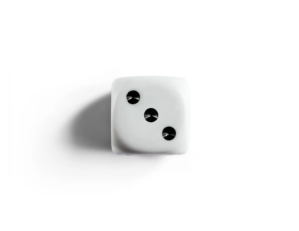

In [6]:
img = cv2.imread("./inputs/dice1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

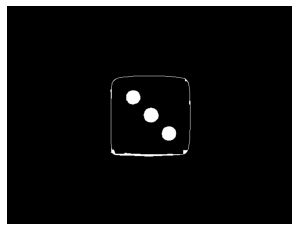

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
close_edges = detect_dice_close_edges(gray)
plt.axis('off')
plt.imshow(close_edges, cmap="gray")
plt.show()

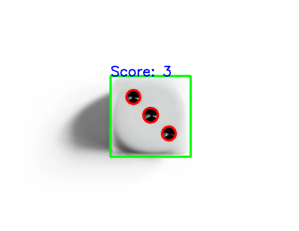

In [12]:
contours, _ = cv2.findContours(close_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = img.copy()
for contour in contours:
    result = calculate_dice_number(contour, result, gray)
plt.axis('off')
plt.imshow(result)
plt.show()

Calculate second dice image

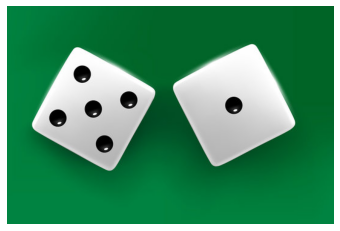

In [13]:
img = cv2.imread("./inputs/dice2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

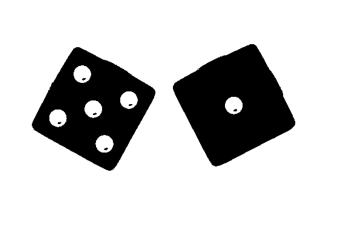

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
close_edges = 255-thresh
plt.axis('off')
plt.imshow(close_edges, cmap="gray")
plt.show()

In [15]:
contours, hierarchy = cv2.findContours(close_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [13,  1,  3,  0],
        [ 5, -1,  4,  2],
        [-1, -1, -1,  3],
        [ 7,  3,  6,  2],
        [-1, -1, -1,  5],
        [ 9,  5,  8,  2],
        [-1, -1, -1,  7],
        [11,  7, 10,  2],
        [-1, -1, -1,  9],
        [-1,  9, 12,  2],
        [-1, -1, -1, 11],
        [-1,  2, 14,  0],
        [-1, -1, 15, 13],
        [-1, -1, -1, 14]]], dtype=int32)

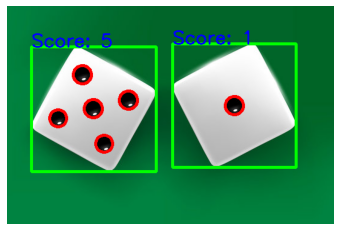

In [16]:
result = img.copy()
for contour in [contours[2], contours[13]]:
    result = calculate_dice_number(contour, result, gray)
plt.axis('off')
plt.imshow(result)
plt.show()

Calculate third image

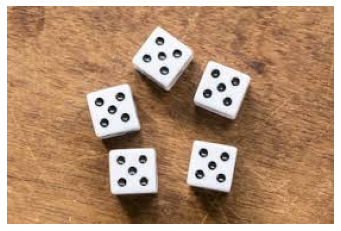

In [17]:
img = cv2.imread("./inputs/dice3.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

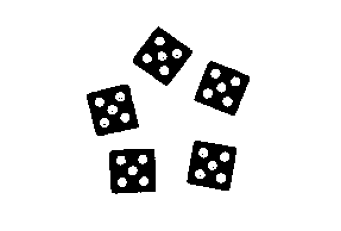

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
close_edges = 255-thresh
plt.axis('off')
plt.imshow(close_edges, cmap="gray")
plt.show()

In [19]:
contours, hierarchy = cv2.findContours(close_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy[0]

array([[-1, -1,  1, -1],
       [ 7, -1,  2,  0],
       [ 3, -1, -1,  1],
       [ 4,  2, -1,  1],
       [ 5,  3, -1,  1],
       [ 6,  4, -1,  1],
       [-1,  5, -1,  1],
       [16,  1,  8,  0],
       [ 9, -1, -1,  7],
       [11,  8, 10,  7],
       [-1, -1, -1,  9],
       [13,  9, 12,  7],
       [-1, -1, -1, 11],
       [14, 11, -1,  7],
       [-1, 13, 15,  7],
       [-1, -1, -1, 14],
       [26,  7, 17,  0],
       [19, -1, 18, 16],
       [-1, -1, -1, 17],
       [20, 17, -1, 16],
       [22, 19, 21, 16],
       [-1, -1, -1, 20],
       [23, 20, -1, 16],
       [-1, 22, 24, 16],
       [25, -1, -1, 23],
       [-1, 24, -1, 23],
       [32, 16, 27,  0],
       [28, -1, -1, 26],
       [29, 27, -1, 26],
       [30, 28, -1, 26],
       [31, 29, -1, 26],
       [-1, 30, -1, 26],
       [-1, 26, 33,  0],
       [34, -1, -1, 32],
       [35, 33, -1, 32],
       [37, 34, 36, 32],
       [-1, -1, -1, 35],
       [39, 35, 38, 32],
       [-1, -1, -1, 37],
       [-1, 37, -1, 32]],

In [20]:
for i, row in enumerate(hierarchy[0]):
    if row[-1] == 0:
        print(i)

1
7
16
26
32


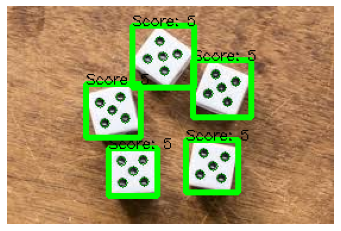

In [21]:
result = img.copy()
for i in [1, 7, 16, 26, 32]:
    circles = []
    for j, row in enumerate(hierarchy[0]):
        if row[-1] == i:
            circles.append(contours[j])
    result = calculate_dice_number_2(contours[i], circles, result)
plt.axis('off')
plt.imshow(result)
plt.show()

Calculate forth image

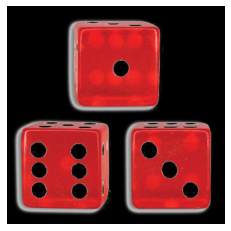

In [22]:
img = cv2.imread("./inputs/dice4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
plt.show()

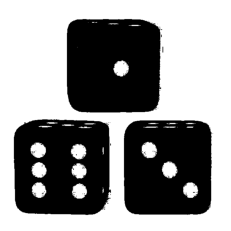

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
close_edges = 255-thresh
plt.axis('off')
plt.imshow(close_edges, cmap="gray")
plt.show()

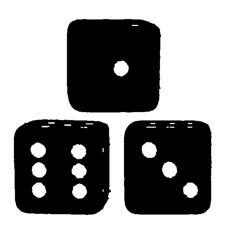

In [24]:
close_edges = cv2.medianBlur(close_edges, 5)
plt.axis('off')
plt.imshow(close_edges, cmap="gray")
plt.show()

In [25]:
contours, hierarchy = cv2.findContours(close_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy[0]

array([[-1, -1,  1, -1],
       [12, -1,  2,  0],
       [ 3, -1, -1,  1],
       [ 4,  2, -1,  1],
       [ 5,  3, -1,  1],
       [ 6,  4, -1,  1],
       [ 7,  5, -1,  1],
       [ 8,  6, -1,  1],
       [ 9,  7, -1,  1],
       [10,  8, -1,  1],
       [11,  9, -1,  1],
       [-1, 10, -1,  1],
       [27,  1, 13,  0],
       [14, -1, -1, 12],
       [15, 13, -1, 12],
       [16, 14, -1, 12],
       [17, 15, -1, 12],
       [18, 16, -1, 12],
       [19, 17, -1, 12],
       [20, 18, -1, 12],
       [21, 19, -1, 12],
       [22, 20, -1, 12],
       [23, 21, -1, 12],
       [24, 22, -1, 12],
       [25, 23, -1, 12],
       [26, 24, -1, 12],
       [-1, 25, -1, 12],
       [-1, 12, 28,  0],
       [29, -1, -1, 27],
       [-1, 28, -1, 27]], dtype=int32)

In [26]:
for i, row in enumerate(hierarchy[0]):
    if row[-1] == 0:
        print(i)

1
12
27


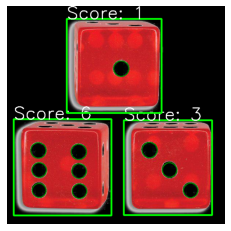

In [27]:
result = img.copy()
for i in [1, 12, 27]:
    circles = []
    for j, row in enumerate(hierarchy[0]):
        if row[-1] == i and cv2.contourArea(contours[j]) > 60:
            circles.append(contours[j])
    result = calculate_dice_number_2(contours[i], circles, result, 1.6, (255, 255, 255), 2)
plt.axis('off')
plt.imshow(result)
plt.show()